# **Dataset : BBC text**

Kriteria :

Dataset minimal memiliki 1000 sampel, Harus menggunakan LSTM dalam arsitektur model sequential, Validation set sebesar 20% dari total dataset, Harus menggunakan Embedding, Harus menggunakan fungsi tokenizer dan Akurasi dari model minimal 75%.

data diri : Jeremy Wijaya

In [1]:
# import libraries dan dataset bbc text
import pandas as pd
import tensorflow as tf
df = pd.read_csv('bbc-text.csv')

In [2]:
# cek dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [3]:
# gunakan one hot encoding untuk mengubah data kategrikal menjadi numerik
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [4]:
# pisahkan label dengan fitur
news = df_baru['text'].values
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [5]:
# lakukan pemecahan training dan validation data set
from sklearn.model_selection import train_test_split
news_latih, news_test, label_latih, label_test = train_test_split(news, label, test_size=0.2)

In [6]:
# lakukan fungsi tokenizer untuk mendapatkan sequence
# lalu gunakan padding agar sequence memiliki array yang sama
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(news_latih) 
tokenizer.fit_on_texts(news_test)
 
sekuens_latih = tokenizer.texts_to_sequences(news_latih)
sekuens_test = tokenizer.texts_to_sequences(news_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [7]:
padded_test[0]

array([   0,    0,    0, ...,   13,    2, 4403], dtype=int32)

In [8]:
# buatlah sebuah class anak dari callback
# buatlah dimana bila accuracy & val_accuracy > 90% 
# akan dilakukan callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [9]:
# buatlah bentuk model sequential dengan 
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
# traning set 1780 bacth size 100 agar mempercepat traning
# lakukan pembuatan model dengan epoch 30
num_epochs = 50
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    batch_size = 100 , 
                    validation_data=(padded_test, label_test),
                    callbacks=[callbacks], 
                    verbose=1
                    )

Epoch 1/50
18/18 [==============================] - 62s 3s/step - loss: 1.5482 - accuracy: 0.3045 - val_loss: 1.4373 - val_accuracy: 0.3798
Epoch 2/50
18/18 [==============================] - 62s 3s/step - loss: 1.3340 - accuracy: 0.4112 - val_loss: 1.2236 - val_accuracy: 0.3775
Epoch 3/50
18/18 [==============================] - 62s 3s/step - loss: 1.1580 - accuracy: 0.4197 - val_loss: 1.1098 - val_accuracy: 0.3753
Epoch 4/50
18/18 [==============================] - 62s 3s/step - loss: 1.0455 - accuracy: 0.4174 - val_loss: 1.0441 - val_accuracy: 0.3753
Epoch 5/50
18/18 [==============================] - 62s 3s/step - loss: 0.9744 - accuracy: 0.4421 - val_loss: 1.0365 - val_accuracy: 0.4045
Epoch 6/50
18/18 [==============================] - 62s 3s/step - loss: 0.9341 - accuracy: 0.4820 - val_loss: 1.0485 - val_accuracy: 0.4809
Epoch 7/50
18/18 [==============================] - 63s 3s/step - loss: 0.8672 - accuracy: 0.5612 - val_loss: 1.0037 - val_accuracy: 0.5820
Epoch 8/50
18/18 [==

In [15]:
# dapat dilihat bahwa fungsi callback tidak dilakukan
# dikarenakan accuracy dan val_accuracy tidak diatas

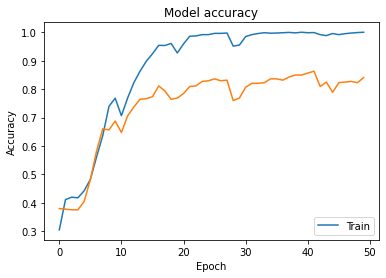

In [16]:
# buat grafik learn rate
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()